In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [28]:
file_path = (r"C:\Users\vatch\Downloads\titanic\tested.csv")
data = pd.read_csv(r"C:\Users\vatch\Downloads\titanic\tested.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data.dropna(subset=['Embarked'], inplace=True)
print(data)

     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...

In [42]:
data = pd.get_dummies(data, columns=['Sex_male', 'Embarked_S'], drop_first=True)


In [43]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked_Q', 'Sex_male_True',
       'Embarked_S_True'],
      dtype='object')


In [46]:
X = data.drop('Survived', axis=1)
y = data['Survived']
print(X)
print(y)

     PassengerId  Pclass                                          Name   Age  \
0            892       3                              Kelly, Mr. James  34.5   
1            893       3              Wilkes, Mrs. James (Ellen Needs)  47.0   
2            894       2                     Myles, Mr. Thomas Francis  62.0   
3            895       3                              Wirz, Mr. Albert  27.0   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  22.0   
..           ...     ...                                           ...   ...   
413         1305       3                            Spector, Mr. Woolf  27.0   
414         1306       1                  Oliva y Ocana, Dona. Fermina  39.0   
415         1307       3                  Saether, Mr. Simon Sivertsen  38.5   
416         1308       3                           Ware, Mr. Frederick  27.0   
417         1309       3                      Peter, Master. Michael J  27.0   

     SibSp  Parch              Ticket  

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test)

     PassengerId  Pclass                           Name   Age  SibSp  Parch  \
336         1228       2     de Brito, Mr. Jose Joaquim  32.0      0      0   
31           923       2  Jefferys, Mr. Clifford Thomas  24.0      2      0   
84           976       2          Lamb, Mr. John Joseph  27.0      0      0   
287         1179       1     Snyder, Mr. John Pillsbury  24.0      1      0   
317         1209       2     Rogers, Mr. Reginald Harry  19.0      0      0   
..           ...     ...                            ...   ...    ...    ...   
71           963       3             Minkoff, Mr. Lazar  21.0      0      0   
106          998       3            Buckley, Mr. Daniel  21.0      0      0   
270         1162       1   McCaffry, Mr. Thomas Francis  46.0      0      0   
348         1240       2               Giles, Mr. Ralph  24.0      0      0   
102          994       3             Foley, Mr. William  27.0      0      0   

         Ticket     Fare Cabin  Embarked_Q  Sex_mal

In [53]:
X_train = X_train.drop(columns=['Name', 'Ticket', 'Cabin'], errors='ignore')
X_test = X_test.drop(columns=['Name', 'Ticket', 'Cabin'], errors='ignore')


In [52]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

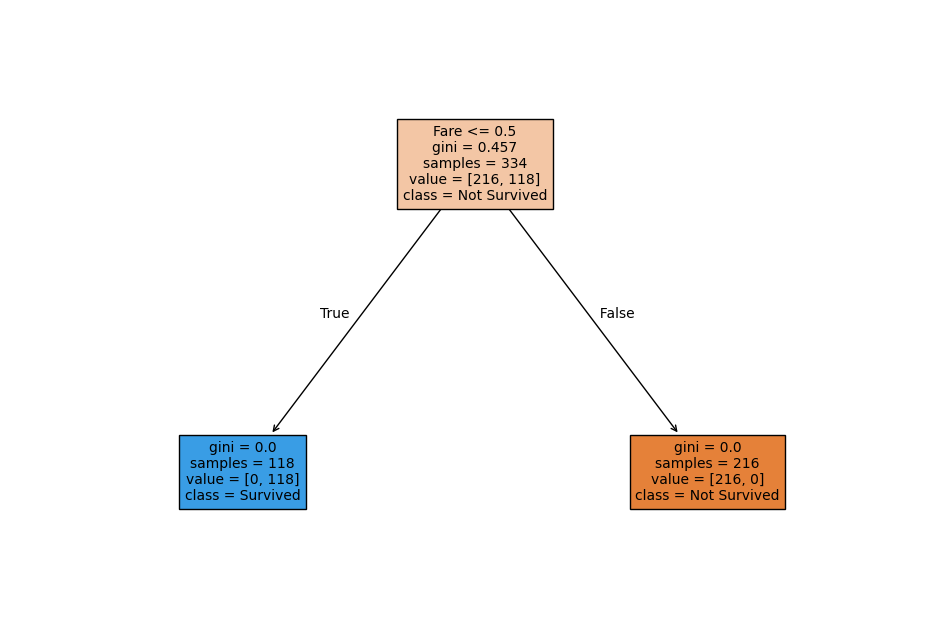

In [54]:
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, max_depth=3, feature_names=X.columns, class_names=['Not Survived', 'Survived'], fontsize=10)
plt.show()


In [55]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


In [60]:
if len(X.columns)==len(feature_importance):
    important_df=pd.Dataframe({'Feature': X.columns, 'Importance': feature_importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    print(importance_df)
else:
    print("Mismatch between the number of features and importance values.")
    print(f"Features: {len(X.columns)}")
    print(f"Importance values: {len(feature_importance)}")



Mismatch between the number of features and importance values.
Features: 12
Importance values: 9
